In [16]:
import random 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
%matplotlib inline

In [4]:
df=pd.read_csv('student-mat.csv',sep=';')
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
df[['G1','G2','G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


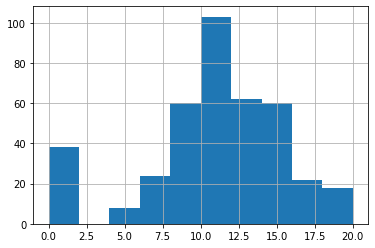

In [7]:
df['G3'].hist()

In [8]:
#Encode the target variable G3 into 3 classes
#Class 1 implies showing a good performance in endsems, Class 2 implies a moderate performance and Class 3 means a weak performance.
#Decision Boundaries - Class 1: 15<=G3<=20, Class 2: 10<=G3<15, Class 3: G3<10

col=np.array(df['G3'])

for i in range(len(col)):
    if col[i]>=15:
        col[i]=1
    elif col[i]>=8 and col[i]<15:
        col[i]=2
    else:
        col[i]=3
        
df['G3']=col
    

In [9]:
df['G3']

0      3
1      3
2      2
3      1
4      2
      ..
390    2
391    1
392    3
393    2
394    2
Name: G3, Length: 395, dtype: int64

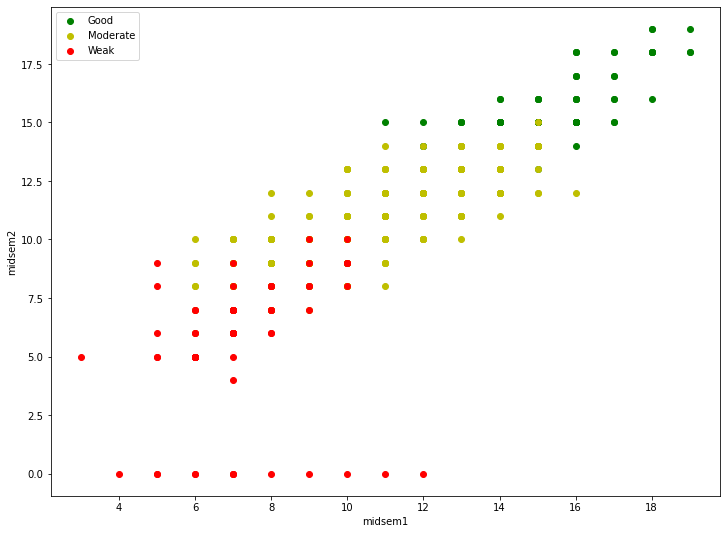

395


In [10]:
def Show_Diagram():
    plt.figure(figsize=(12,9))
    plt.xlabel("midsem1")
    plt.ylabel("midsem2")
    unique = list(set(df['G3']))
    colors = {1:'g',2:'y',3:'r'}
    labels={1:'Good',2:'Moderate',3:'Weak'}
    pt=0
    for i, u in enumerate(unique):
        xi = [df['G1'][j] for j  in range(len(df)) if df['G3'][j] == u]
        yi = [df['G2'][j] for j  in range(len(df)) if df['G3'][j] == u]
        plt.scatter(xi, yi, c=colors[i+1], label=labels[i+1])
        pt+=len(xi)

    plt.legend()
    plt.show()
    print(pt)
Show_Diagram()


In [11]:
#Scale the values in the range 0-1
min1=min(df['G1'])
min2=min(df['G2'])
max1=max(df['G1'])
max2=max(df['G2'])
df['G1']=(df['G1']-min1)/(max1-min1)
df['G2']=(df['G2']-min2)/(max2-min2)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,0.1250,0.315789,3
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,0.1250,0.263158,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,0.2500,0.421053,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,0.7500,0.736842,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,0.1875,0.526316,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,0.3750,0.473684,2
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,0.6875,0.842105,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,0.4375,0.421053,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,0.5000,0.631579,2


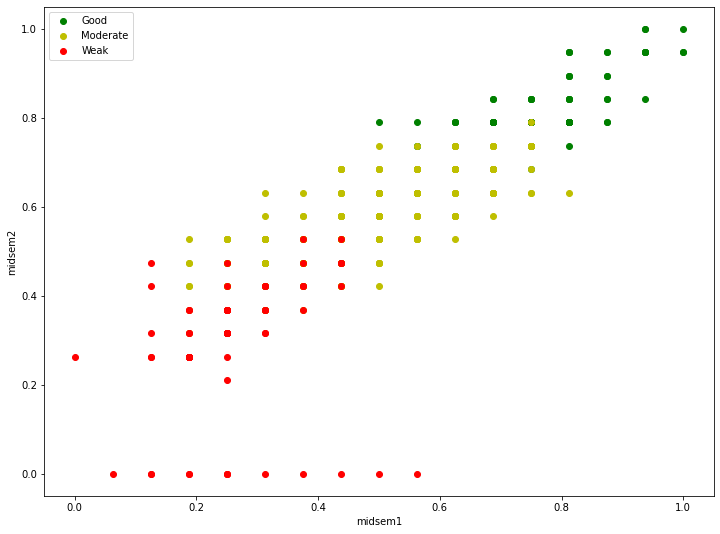

395


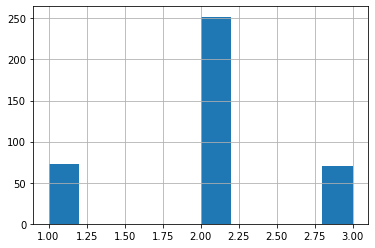

In [12]:
Show_Diagram()
df['G3'].hist()

In [13]:
#extracting only the important features and the target variable from the dataframe
X=df[['G1','G2']].values
y=df['G3'].values

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=True)


In [17]:
models = []
models.append(('LR', LogisticRegression(multi_class="multinomial")))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=0.5,kernel='linear')))

In [18]:
results = []
names = []
clsf = []

print("Model : Accuracy")
for name,model in models:
    model_inst = model
    model_inst.fit(X_train,y_train)
    y_pred = model_inst.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_pred)
    results.append(metrics.accuracy_score(y_test, y_pred))
    names.append(name)
    msg = "%s: %f" % (name, acc)
    print(msg)
    clsf.append(model_inst)
    


Model : Accuracy
LR: 0.873418
LDA: 0.886076
KNN: 0.911392
DTC: 0.898734
NB: 0.898734
SVM: 0.886076


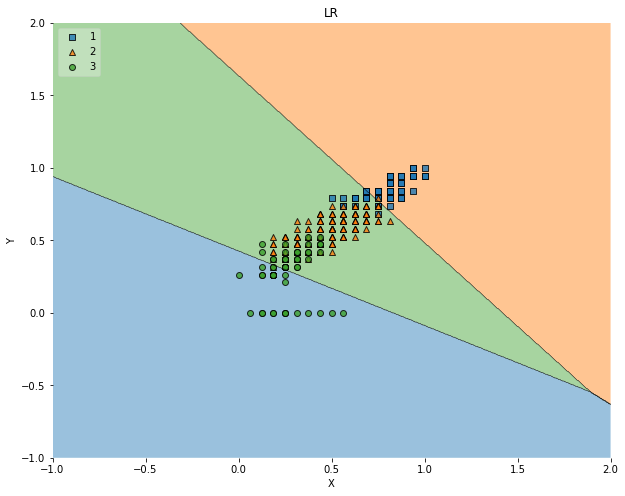

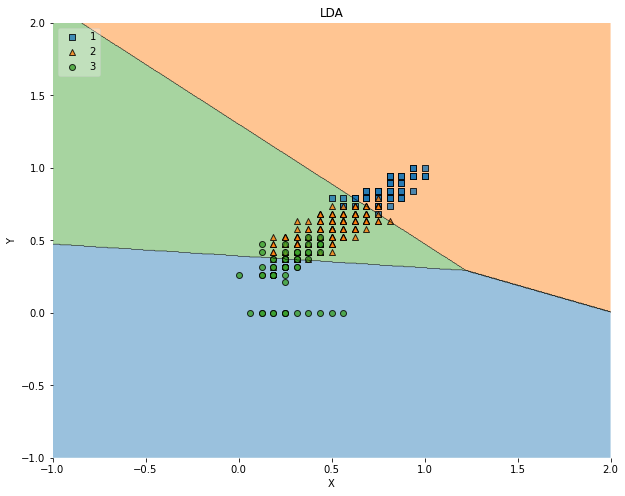

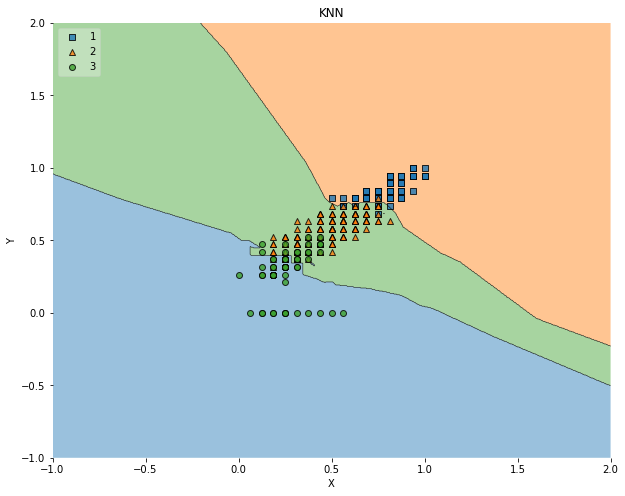

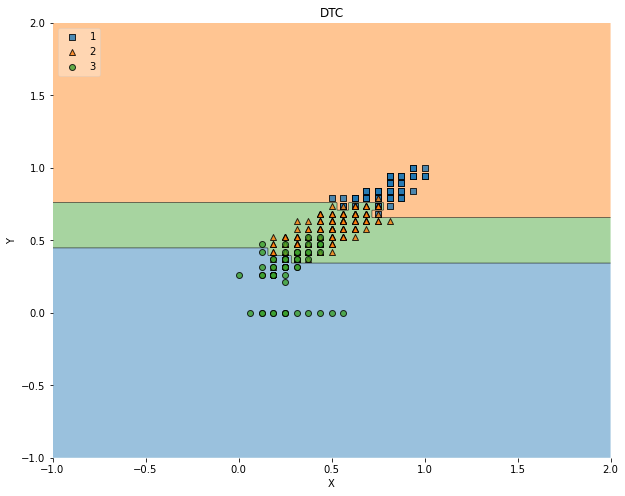

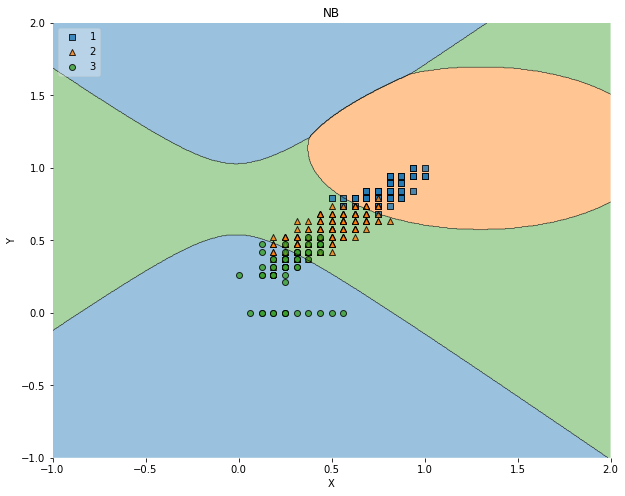

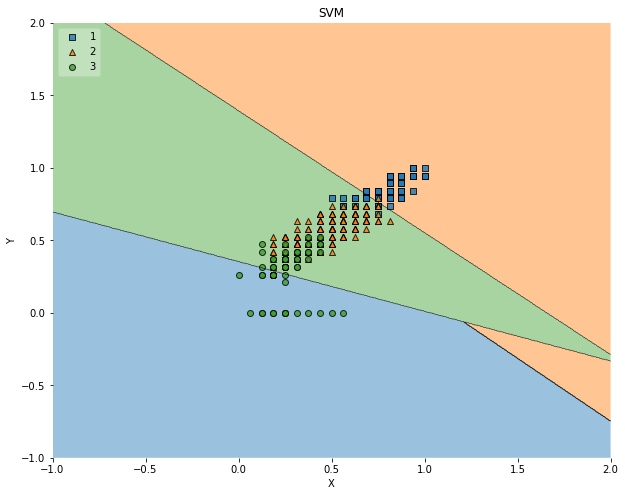

In [259]:
for cls,name in zip(clsf,names):
    show_decision(X,y,cls,name)

In [258]:
def show_decision(X,y,clf1,title):
    from mlxtend.plotting import plot_decision_regions
    import matplotlib.gridspec as gridspec
    import itertools
    import warnings
    warnings.filterwarnings("ignore",category=UserWarning)
    plt.figure(figsize=(10,8))
    plot_decision_regions(X,y.astype(int), clf=clf1,legend=2)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    plt.close()


### Thus KNN outperforms the rest. We could use this model to predict student's performance in the endsem with an accuracy of 91.1%